# New York City Taxi Trip Duration

# File descriptions

**train.csv** - the training set (contains 1458644 trip records)<br>
**test.csv** - the testing set (contains 625134 trip records)<br>
**sample_submission.csv** - a sample submission file in the correct format

# Data fields

**id** - a unique identifier for each trip<br>
**vendor_id** - a code indicating the provider associated with the trip record<br>
**pickup_datetime** - date and time when the meter was engaged<br>
**dropoff_datetime** - date and time when the meter was disengaged<br>
**passenger_count** - the number of passengers in the vehicle (driver entered value)<br>
**pickup_longitude** - the longitude where the meter was engaged<br>
**pickup_latitude** - the latitude where the meter was engaged<br>
**dropoff_longitude** - the longitude where the meter was disengaged<br>
**dropoff_latitude** - the latitude where the meter was disengaged<br>
**store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip<br>
**trip_duration** - duration of the trip in seconds

In [261]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
color = sns.color_palette()

%matplotlib inline

In [262]:
INPUT_FOLDER='/Users/pd186040/Documents/Kaggle/NYC Taxi Trip Duration/'
print ('File Sizes:')
for f in os.listdir(INPUT_FOLDER):
    if 'zip' not in f:
       print (f.ljust(30) + str(round(os.path.getsize(INPUT_FOLDER +  f) / 1000, 2)) + ' KB')

File Sizes:
.DS_Store                     6.15 KB
.ipynb_checkpoints            0.1 KB
NYC_Taxi_Trip.ipynb           307.13 KB
sample_submission.csv         8751.89 KB
test.csv                      70794.29 KB
train.csv                     200589.1 KB


In [263]:
train= pd.read_csv("/Users/pd186040/Documents/Kaggle/NYC Taxi Trip Duration/train.csv")

In [264]:
train.shape

(1458644, 11)

In [265]:
train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [266]:
test=pd.read_csv("/Users/pd186040/Documents/Kaggle/NYC Taxi Trip Duration/test.csv")

In [267]:
test.shape

(625134, 9)

In [268]:
test.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


# Missing Values

In [269]:
#checking for missing values
train_total=train.isnull().sum()
train_total

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [270]:
vendor_count=train['vendor_id'].value_counts()
vendor_count

2    780302
1    678342
Name: vendor_id, dtype: int64

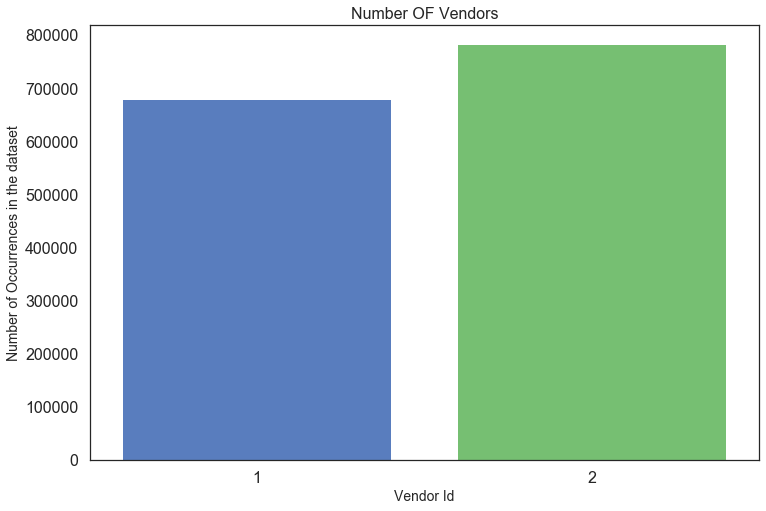

In [271]:
plt.figure(figsize=(12,8))
sns.barplot(vendor_count.index, vendor_count.values)
plt.ylabel('Number of Occurrences in the dataset', fontsize=14)
plt.xlabel('Vendor Id', fontsize=14)
plt.title('Number OF Vendors', fontsize=16)

In [272]:
passg_count=train['passenger_count'].value_counts()
passg_count

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

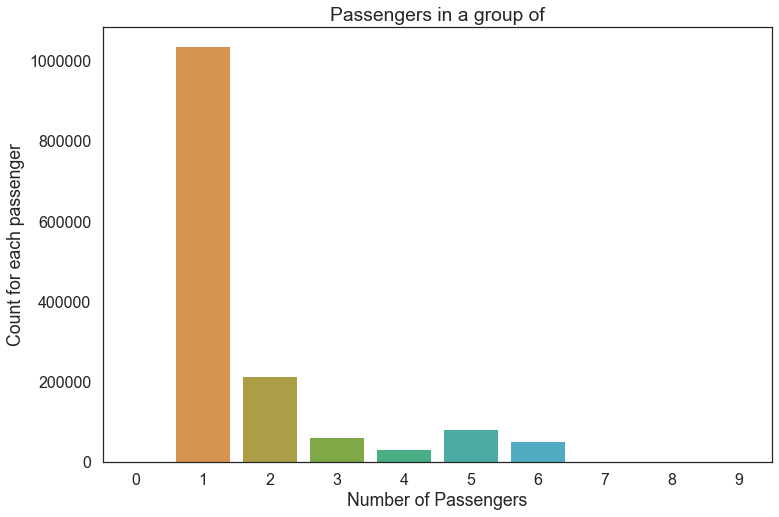

In [273]:
plt.figure(figsize=(12,8))
sns.barplot(passg_count.index, passg_count.values)
plt.title("Passengers in a group of")
plt.ylabel("Count for each passenger")
plt.xlabel("Number of Passengers");


- Most popular choice of travel is single. and 2nd popular way of ride is with a single friend. and may be for long cars popular choice of travel is in group of 5 and then in group of 6 people. 
- There are only 3 trips in group of 7 and single trip in group of 8 and 9 each.
- There are 60 trips with zero passengers. Those must be outliers and have to be removed. Because no taxi ride can happen without passenger, atleast paid one.

In [274]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)

In [275]:
train.loc[:, 'pick_date'] = train['pickup_datetime'].dt.date
train.loc[:, 'pick_month'] = train['pickup_datetime'].dt.month
train.loc[:, 'week_of_year'] = train['pickup_datetime'].dt.weekofyear
train.loc[:, 'day_of_year'] = train['pickup_datetime'].dt.dayofyear
train.loc[:, 'day_of_week'] = train['pickup_datetime'].dt.dayofweek
train.loc[:, 'time'] = train['pickup_datetime'].dt.time
train.loc[:, 'hour'] = train['pickup_datetime'].dt.hour

In [276]:
train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_date,pick_month,week_of_year,day_of_year,day_of_week,time,hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,3,11,74,0,17:24:55,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,6,23,164,6,00:43:35,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,1,3,19,1,11:35:24,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,4,14,97,2,19:32:31,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,3,12,86,5,13:30:55,13


In [277]:
g =train.groupby(["day_of_week","vendor_id"]).size()

In [278]:
grouped1=pd.DataFrame()

In [279]:
grouped1=train.groupby(["day_of_week","vendor_id"]).size()

In [280]:
grouped1

day_of_week  vendor_id
0            1             87282
             2            100136
1            1             93857
             2            108892
2            1             98090
             2            112046
3            1            102030
             2            116544
4            1            104338
             2            119195
5            1            102616
             2            118252
6            1             90129
             2            105237
dtype: int64

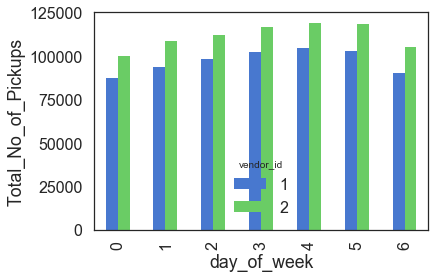

In [281]:
grouped1.unstack().plot(kind='bar')
plt.ylabel('Total_No_of_Pickups')

We find:<br>
- Vendor 2 has significantly more trips in this data set than vendor 1. This is true for every day of the week.<br>
- We find an interesting pattern with Monday being the quietest day and Friday very busy. This is the same for the two different vendors, with vendor_id == 2 showing significantly higher trip numbers.

In [282]:
train["store_and_fwd_flag"].replace(['N','Y'],[0,1],inplace=True)

Replacing N by "0" and Y by "1"

In [283]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_date,pick_month,week_of_year,day_of_year,day_of_week,time,hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14,3,11,74,0,17:24:55,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12,6,23,164,6,00:43:35,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19,1,3,19,1,11:35:24,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06,4,14,97,2,19:32:31,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26,3,12,86,5,13:30:55,13
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,0,443,2016-01-30,1,4,30,5,22:01:40,22
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,0,341,2016-06-17,6,24,169,4,22:34:59,22
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,0,1551,2016-05-21,5,20,142,5,07:54:58,7
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,0,255,2016-05-27,5,21,148,4,23:12:23,23
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,0,1225,2016-03-10,3,10,70,3,21:45:01,21


In [284]:
sf=train.groupby(["store_and_fwd_flag"]).size()

In [285]:
sf

store_and_fwd_flag
0    1450599
1       8045
dtype: int64

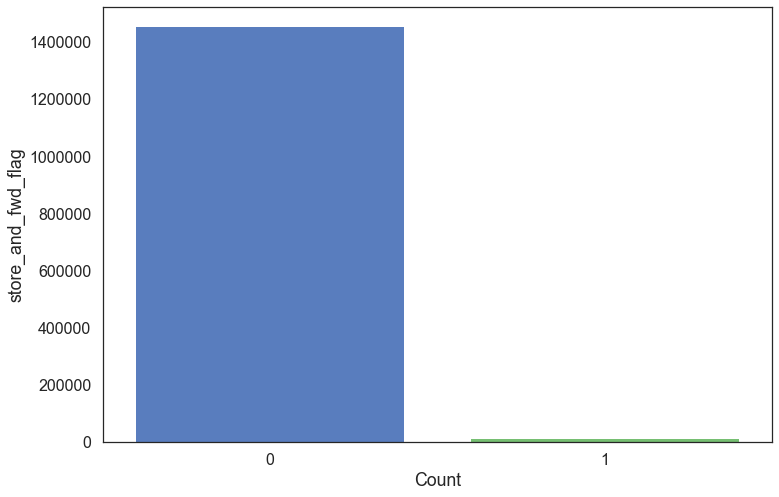

In [286]:
plt.figure(figsize=(12,8))
sns.barplot(sf.index, sf.values)
plt.ylabel("store_and_fwd_flag")
plt.xlabel("Count")

The store_and_fwd_flag values, indicating whether the trip data was sent immediately to the vendor (“0”) or held in the memory of the taxi because there was no connection to the server (“1”), show that there was almost no storing taking place

In [287]:
pm=train.groupby(["pick_month"]).size()

In [288]:
pm

pick_month
1    229707
2    238300
3    256189
4    251645
5    248487
6    234316
dtype: int64

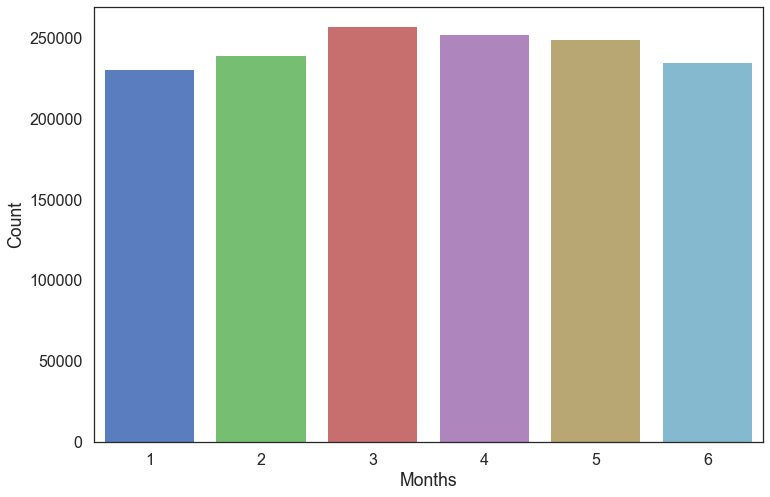

In [289]:
plt.figure(figsize=(12,8))
sns.barplot(pm.index, pm.values)
plt.xlabel("Months")
plt.ylabel("Count")

<div class="alert alert-block alert-info">
1. JANUARY<BR>
2. FEBRURAY<BR>
3. MARCH<BR>
4. APRIL<BR>
5. MAY<BR>
6. JUNE<BR>

January and June have fewer trips, whereas March and April are busier months.

In [290]:
h=train.groupby(["hour"]).size()

In [291]:
h

hour
0     53248
1     38571
2     27972
3     20895
4     15792
5     15002
6     33248
7     55600
8     67053
9     67663
10    65437
11    68476
12    71873
13    71473
14    74292
15    71811
16    64313
17    76483
18    90600
19    90308
20    84072
21    84185
22    80492
23    69785
dtype: int64

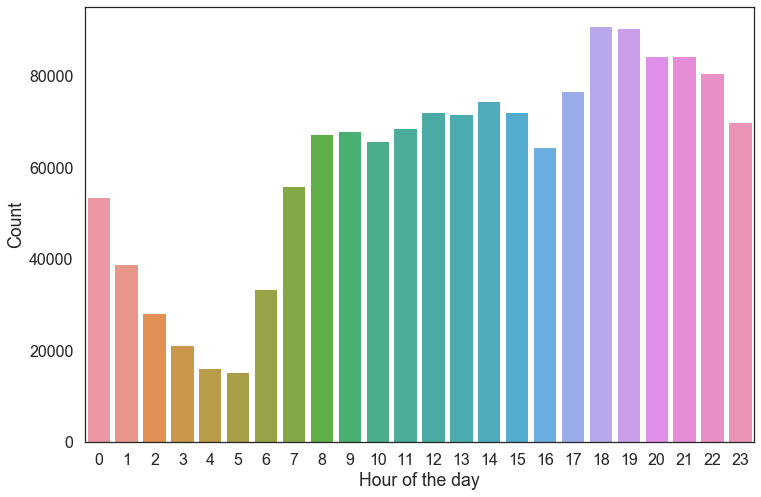

In [292]:
plt.figure(figsize=(12,8))
sns.barplot(h.index, h.values)
plt.xlabel("Hour of the day")
plt.ylabel("Count")

The trip numbers are higher during the night hours but lower ones in the morning between 5 and 10.

In [293]:
import math

def distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [294]:
def distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [295]:
train['dist']=distance(train.pickup_latitude.values,train.pickup_longitude.values,train.dropoff_latitude.values,train.dropoff_longitude.values)

In [296]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_date,pick_month,week_of_year,day_of_year,day_of_week,time,hour,dist
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14,3,11,74,0,17:24:55,17,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12,6,23,164,6,00:43:35,0,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19,1,3,19,1,11:35:24,11,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06,4,14,97,2,19:32:31,19,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26,3,12,86,5,13:30:55,13,1.188588
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,0,443,2016-01-30,1,4,30,5,22:01:40,22,1.098942
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,0,341,2016-06-17,6,24,169,4,22:34:59,22,1.326279
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,0,1551,2016-05-21,5,20,142,5,07:54:58,7,5.714981
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,0,255,2016-05-27,5,21,148,4,23:12:23,23,1.310353
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,0,1225,2016-03-10,3,10,70,3,21:45:01,21,5.121162
